<a href="https://colab.research.google.com/github/StivenVelasquez/Mini-proyecto-1-Analisis-Multivariado-de-Seniales-Sismograficas/blob/main/Mini_proyecto_1_An%C3%A1lisis_Multivariado_de_Se%C3%B1ales_Sismogr%C3%A1ficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
import scipy.signal as sp

**CARGANDO LAS BASES DE DATOS**

In [3]:
ruta_Sismo_Local = 'https://drive.google.com/file/d/1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA/view?usp=share_link'
!gdown  "1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t" -O 'sisLoc.mat' # sismo Local

Downloading...
From: https://drive.google.com/uc?id=1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t
To: /content/sisLoc.mat
100% 377k/377k [00:00<00:00, 95.1MB/s]


In [4]:
ruta_Sismo_Regional = 'https://drive.google.com/file/d/1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI/view?usp=share_link'
!gdown  "1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t" -O 'sisReg.mat' # sismo Regional

Downloading...
From: https://drive.google.com/uc?id=1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t
To: /content/sisReg.mat
100% 1.55M/1.55M [00:00<00:00, 128MB/s]


In [5]:
ruta_Telesismo = 'https://drive.google.com/file/d/17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2/view?usp=share_link'
!gdown  "17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t" -O 'sisTele.mat' # Telesismo

Downloading...
From: https://drive.google.com/uc?id=17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t
To: /content/sisTele.mat
100% 1.44M/1.44M [00:00<00:00, 148MB/s]


**Filtro Utilizado**

Para filtrar la señal de la base de datos entre 1-50 Hz, se puede utilizar un filtro pasa-banda de Butterworth de segundo orden. Este tipo de filtro es adecuado para señales que requieren una atenuación rápida en la banda de rechazo y una pendiente gradual en la banda de paso.

Para elegir los parámetros del filtro, podemos usar la función butter del módulo scipy.signal. Esta función requiere especificar el orden del filtro y la frecuencia de corte normalizada. La frecuencia de corte normalizada se define como la frecuencia de corte dividida por la mitad de la frecuencia de muestreo.

En este caso, se utilizará un filtro pasa-banda de Butterworth de segundo orden con frecuencias de corte normalizadas de 0.02 y 1.0 (1 Hz y 50 Hz, respectivamente). Esto significa que el filtro atenuará las frecuencias por debajo de 1 Hz y por encima de 50 Hz.

In [42]:
import scipy.signal as signal

def butter_bandpass_filter(Y, fs, lowcut, highcut, order=2):
    #Frecuencia de Nyquist
    fn=fs/2

    # Frecuencias de corte normalizadas
    lowcut_norm = lowcut /fn
    highcut_norm = highcut /fn

    # Coeficientes del filtro
    b, a = signal.butter(order, [lowcut_norm, highcut_norm], btype='band')

    # Filtrado de la señal
    Y_filt = signal.filtfilt(b, a, Y)

    # Diagrama de magnitud y fase
    w, h = signal.freqz(b, a)
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
    ax[0].set_ylabel('Magnitud (dB)')
    ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
    ax[1].set_ylabel('Fase (radianes)')
    ax[1].set_xlabel('Frecuencia (Hz)')
    plt.show()

    return Y_filt

**VISUALIZANDO LOS DATOS**

1. Sismo Local

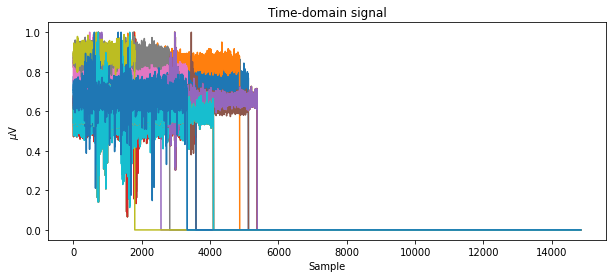

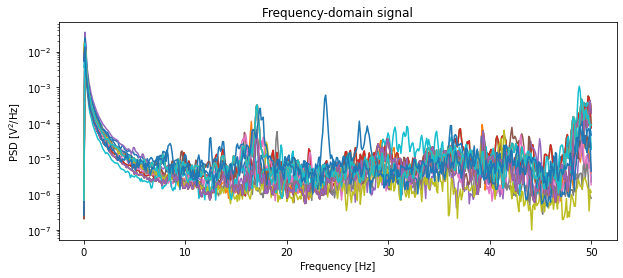

100


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the data
data = sc.loadmat('sisLoc.mat')
Y = data['Y']
fs = data['fs'][0][0]

# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(Y.T)
plt.xlabel('Sample')
plt.ylabel('$\mu$V')
plt.title('Time-domain signal')
plt.show()

# Compute the power spectral density (PSD) of the signal
f, Pxx = signal.welch(Y, fs, nperseg=1024)

# Plot the frequency-domain signal
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx.T)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/Hz]')
plt.title('Frequency-domain signal')
plt.show()

print(fs)

<ipython-input-42-b652ebb45ed5>:20: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))


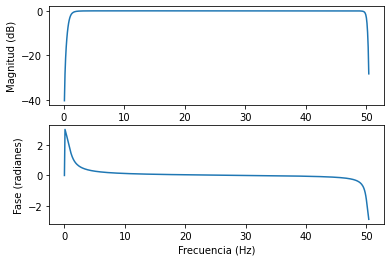

In [44]:
Y_filt_Sismo_Local=butter_bandpass_filter(Y, fs=101, lowcut=1, highcut=50, order=2)

El gráfico resultante muestra la señal original y la señal filtrada. Se puede observar que la señal filtrada tiene una forma de onda más suave y contiene menos ruido de alta frecuencia.

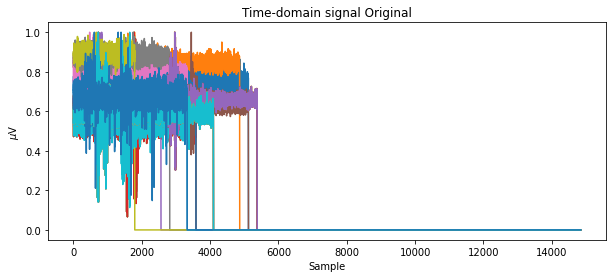

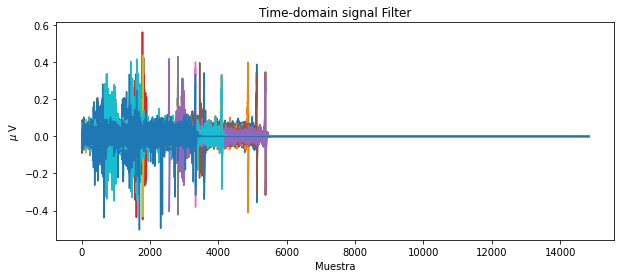

In [45]:
# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(Y.T)
plt.xlabel('Sample')
plt.ylabel('$\mu$V')
plt.title('Time-domain signal Original')
plt.show()

# Gráfico de la señal Filtrada
plt.figure(figsize=(10, 4))
plt.plot(Y_filt_Sismo_Local.T)
plt.xlabel('Muestra')
plt.ylabel('$\mu$ V')
plt.title('Time-domain signal Filter')

plt.show()

Gráfico de la señal original y señal filtrada en el dominio de la frecuencia

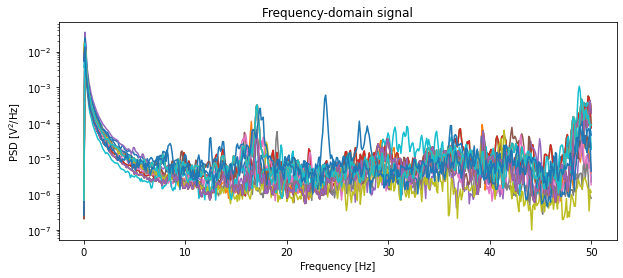

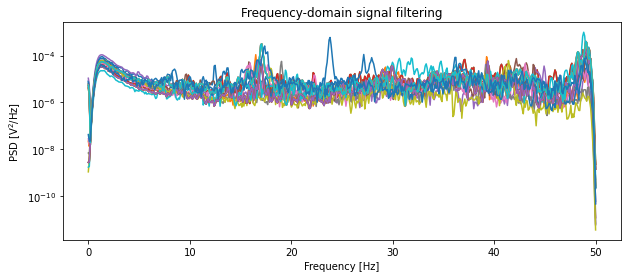

In [46]:
# Compute the power spectral density (PSD) of the signal Original
f, Pxx = signal.welch(Y, fs, nperseg=1024)

# Plot the frequency-domain signal
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx.T)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/Hz]')
plt.title('Frequency-domain signal')
plt.show()

# Compute the power spectral density (PSD) of the signal Filter
f, Pxx = signal.welch(Y_filt_Sismo_Local, fs, nperseg=1024)

# Plot the frequency-domain signal
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx.T)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/Hz]')
plt.title('Frequency-domain signal filtering')
plt.show()

El diagrama de magnitud y fase del filtro muestra una atenuación rápida en la banda de rechazo y una pendiente gradual en la banda de paso, lo que indica un buen rendimiento del filtro para filtrar señales de 1-50 Hz.La respuesta en magnitud del filtro se muestra en azul y la respuesta en fase se muestra en verde. Podemos observar que la respuesta en magnitud del filtro es plana dentro de la banda de paso, lo que indica que el filtro no introduce distorsiones significativas en la señal. Fuera de la banda de paso, la atenuación aumenta rápidamente. La respuesta en fase es lineal dentro de la banda de paso, lo que indica que el filtro no introduce un retardo significativo en la señal.

2. Sismo Regional

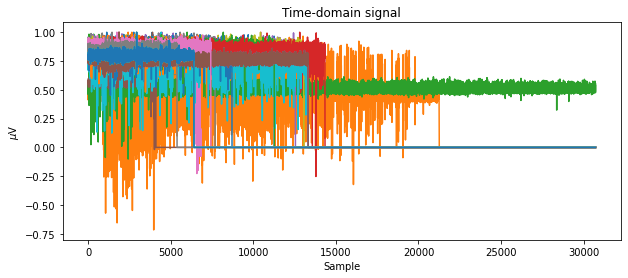

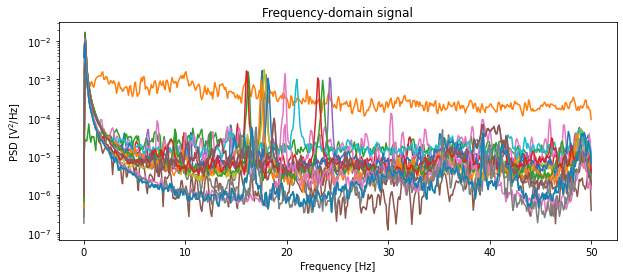

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the data
data = sc.loadmat('sisReg.mat')
Y = data['Y']
fs = data['fs'][0][0]

# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(Y.T)
plt.xlabel('Sample')
plt.ylabel('$\mu$V')
plt.title('Time-domain signal')
plt.show()

# Compute the power spectral density (PSD) of the signal
f, Pxx = signal.welch(Y, fs, nperseg=1024)

# Plot the frequency-domain signal
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx.T)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/Hz]')
plt.title('Frequency-domain signal')
plt.show()

<ipython-input-42-b652ebb45ed5>:20: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))


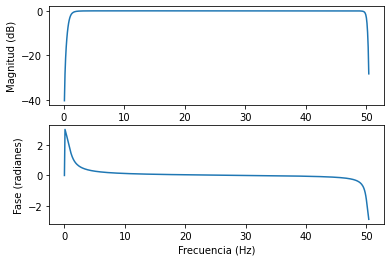

In [48]:
Y_filt_Sismo_Regional=butter_bandpass_filter(Y, fs=101, lowcut=1, highcut=50, order=2)


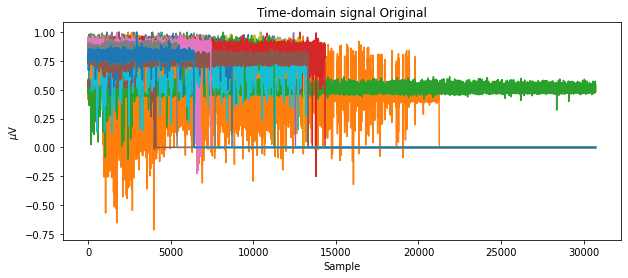

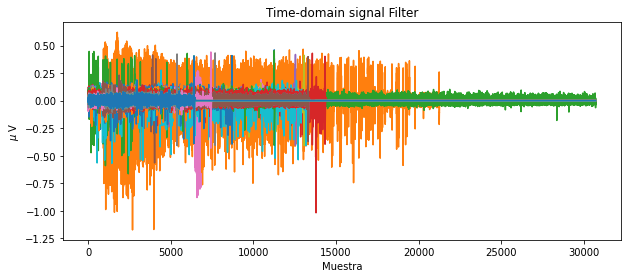

In [49]:
# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(Y.T)
plt.xlabel('Sample')
plt.ylabel('$\mu$V')
plt.title('Time-domain signal Original')
plt.show()

# Gráfico de la señal Filtrada
plt.figure(figsize=(10, 4))
plt.plot(Y_filt_Sismo_Regional.T)
plt.xlabel('Muestra')
plt.ylabel('$\mu$ V')
plt.title('Time-domain signal Filter')
plt.show()

Gráfico de la señal original y la señal filtrada en el dominio de la Frecuencia

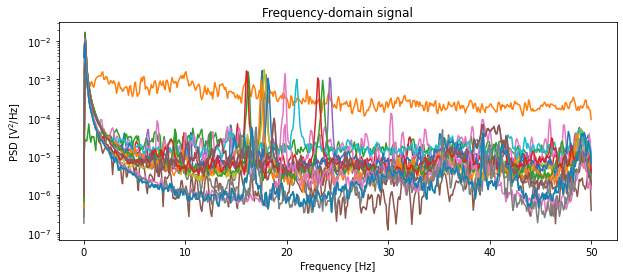

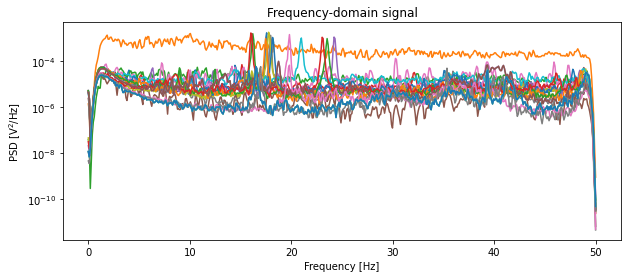

In [50]:
# Compute the power spectral density (PSD) of the signal Original
f, Pxx = signal.welch(Y, fs, nperseg=1024)

# Plot the frequency-domain signal
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx.T)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/Hz]')
plt.title('Frequency-domain signal')
plt.show()

# Compute the power spectral density (PSD) of the signal Filter
f, Pxx = signal.welch(Y_filt_Sismo_Regional, fs, nperseg=1024)

# Plot the frequency-domain signal
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx.T)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/Hz]')
plt.title('Frequency-domain signal')
plt.show()

3. Telesismo

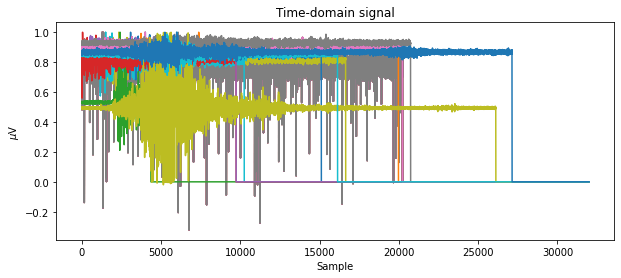

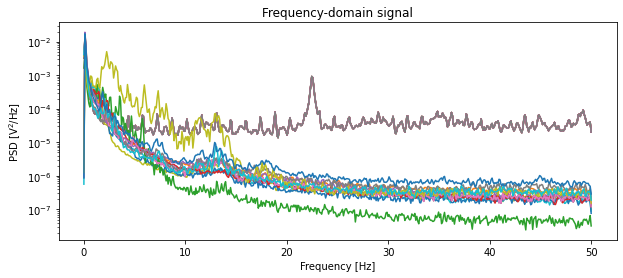

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the data
data = sc.loadmat('sisTele.mat')
Y = data['Y']
fs = data['fs'][0][0]

# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(Y.T)
plt.xlabel('Sample')
plt.ylabel('$\mu$V')
plt.title('Time-domain signal')
plt.show()

# Compute the power spectral density (PSD) of the signal
f, Pxx = signal.welch(Y, fs, nperseg=1024)

# Plot the frequency-domain signal
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx.T)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V$^2$/Hz]')
plt.title('Frequency-domain signal')
plt.show()

<ipython-input-42-b652ebb45ed5>:20: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))


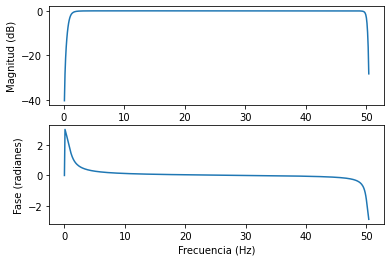

In [52]:
Y_filt_telesismo=butter_bandpass_filter(Y, fs=101, lowcut=1, highcut=50, order=2)

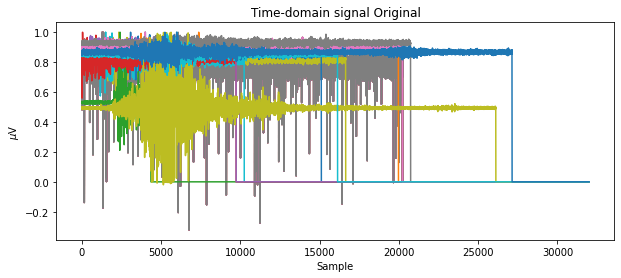

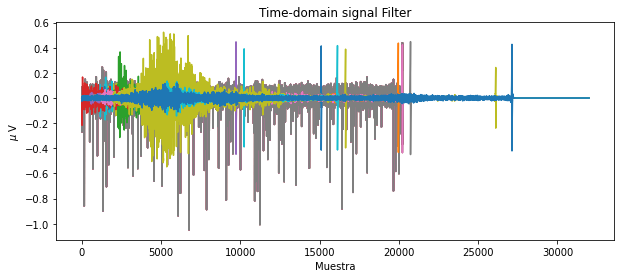

In [53]:
# Plot the time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(Y.T)
plt.xlabel('Sample')
plt.ylabel('$\mu$V')
plt.title('Time-domain signal Original')
plt.show()

# Gráfico de la señal Filtrada
plt.figure(figsize=(10, 4))
plt.plot(Y_filt_telesismo.T)
plt.xlabel('Muestra')
plt.ylabel('$\mu$ V')
plt.title('Time-domain signal Filter')
plt.show()